# Plot alternatives for Batch

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import pandas as pd
import numpy as np

import holoviews as hv
import hvplot.pandas

In [3]:
import cellpy

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
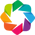

In [4]:
hv.extension('bokeh')
pd.set_option('display.max_columns', 500)

In [5]:
# only for my MacBook
filename = "../testdata/hdf5/20160805_test001_45_cc.h5"
assert os.path.isfile(filename)
my_cell = cellpy.cell(filename)

(cellpy) - Making CellpyData class and setting prms
(cellpy) - Loading cellpy-file: ../testdata/hdf5/20160805_test001_45_cc.h5
(cellpy) - Created CellpyData object


## Plotting summaries

In [6]:
summary = my_cell.dataset.dfsummary

In [7]:
x = "Cycle_Index"
y = ["Charge_Capacity(mAh/g)", "Discharge_Capacity(mAh/g)"]

(summary.hvplot(x, y, kind="scatter") * summary.hvplot(x, y, kind="line"))

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Scatter   [Cycle_Index]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [Cycle_Index]   (value)

## Plotting raw data

In [8]:
raw = my_cell.dataset.dfdata


In [9]:
from holoviews import opts
from holoviews.plotting.links import RangeToolLink

def _rawplot(raw_curve, title="Voltage versus time"):
    tgt = raw_curve.relabel(title).opts(
        width=800, height=300, labelled=['y'], 
        #tools=["pan","box_zoom", "reset"], 
        active_tools=['pan'],
    )
    src = raw_curve.opts(width=800, height=100, yaxis=None, default_tools=[])

    RangeToolLink(src, tgt)

    layout = (tgt + src).cols(1)
    layout.opts(opts.Layout(shared_axes=False, merge_tools=False))
    return layout

In [28]:
def rawplot(raw, y=("Voltage", "Voltage (V vs Li/Li+)"), title="Voltage versus time"):
    raw["Test_Time_Hrs"] = raw["Test_Time"]/3600
    x = ("Test_Time_Hrs", "Time (hours)")
    raw_curve = hv.Curve(raw, x, y, )
    layout = _rawplot(raw_curve, title=title)
    return layout

In [32]:
rawplot(raw, y=("Current", "current (A)"), title="current")

:Layout
   .Curve.Current :Curve   [Test_Time_Hrs]   (Current)
   .Curve.I       :Curve   [Test_Time_Hrs]   (Current)

In [12]:
title="Voltage versus time"

raw["Test_Time_Hrs"] = raw["Test_Time"]/3600
x = ("Test_Time_Hrs", "Time (hours)")
y1 = ("Voltage", "Voltage (V vs Li/Li+)")
y2 = ("Current", "Current (A)")
raw_curve1 = hv.Curve(raw, x, y1)
raw_curve2 = hv.Curve(raw, x, y2)

tgt1 = raw_curve1.relabel(title).opts(
    width=800, height=300, labelled=['y'], 
    #tools=["pan","box_zoom", "reset"], 
    active_tools=['pan'],
)

tgt2 = raw_curve2.relabel("Current vs time").opts(
    width=800, height=300, labelled=['y'], 
)

src = raw_curve1.opts(width=800, height=100, yaxis=None, default_tools=[])

RangeToolLink(src, tgt1)

# funker ikke (?) å linke to figurer til samme "rangetoolpanel"
linked = (tgt1 + src)
linked.opts(opts.Layout(shared_axes=False, merge_tools=False))
layout = (tgt2 + linked).cols(1)
layout.opts(opts.Layout(shared_axes=True, merge_tools=False))

:Layout
   .Curve.Current_vs_time     :Curve   [Test_Time_Hrs]   (Current)
   .Curve.Voltage_versus_time :Curve   [Test_Time_Hrs]   (Voltage)
   .Curve.I                   :Curve   [Test_Time_Hrs]   (Voltage)

In [33]:
x =  ("Test_Time_Hrs", "Time (hours)")
layout_ex = [hv.Curve(raw, x, y) for y in ["Voltage", "Current"]]

In [50]:
vo1 = hv.Curve(raw, x, "Voltage", group="one")
vo2 = hv.Curve(raw, x, "Voltage", group="one")
vo3 = hv.Curve(raw, x, "Current", group="two")
d1 = {
    "v1": vo1,
    "v2": vo2,
    "c1": vo3,
}

In [52]:
%%opts NdLayout [tabs=True]
nn = hv.NdLayout(d1)
nn

:NdLayout   [Default]
   :Curve   [Test_Time_Hrs]   (Voltage)

In [49]:
%%opts Layout [tabs=True] Curve [width=800]
newlayout = hv.Layout(vo1+vo2+vo3, )
newlayout

:Layout
   .One.I  :Curve   [Test_Time_Hrs]   (Voltage)
   .One.II :Curve   [Test_Time_Hrs]   (Voltage)
   .Two.I  :Curve   [Test_Time_Hrs]   (Current)

In [13]:
from numpy.random import randn
layout_ex = [hv.Scatter((randn(10), randn(10)), label=str(i)) for i in range(5)]

In [14]:
%%opts Layout [tabs=True]
hv.Layout(layout_ex)

:Layout
   .Scatter.A_0 :Scatter   [x]   (y)
   .Scatter.A_1 :Scatter   [x]   (y)
   .Scatter.A_2 :Scatter   [x]   (y)
   .Scatter.A_3 :Scatter   [x]   (y)
   .Scatter.A_4 :Scatter   [x]   (y)

In [19]:
vo = rawplot(raw)
cu = rawplot(raw, y=("Current", "current (A)"), title="Current")

In [25]:
%%opts Layout [tabs=True]
hv.Layout(vo).tabs()

AttributeError: 'Layout' object has no attribute tabs.